
# Clasificación

### Tipos:
- Estadísticos
  - NB Gaussiano, NB Bernoulli, Red Bayesiana
- Por vecindad
  - NN, kNN, k*
- Redes neuronales
  - Perceptron Multicapa, otras ...
- Análisis de discriminación lineal
- SVM
  - linear based kernel, radial base kernel, polynomial base kernel
- Árboles de decisiones
  - c45, ...

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
# clasificadores
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
# metricas de desempeño
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import (cross_val_score, 
                                      StratifiedKFold,
                                      train_test_split)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits, load_iris

/home/ramon/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Iris

In [5]:
names_iris = load_iris().feature_names
tabla_iris = pd.DataFrame(columns=names_iris, data=load_iris().data)
tabla_iris['Target'] = load_iris().target
tabla_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Veamos las distribuciones

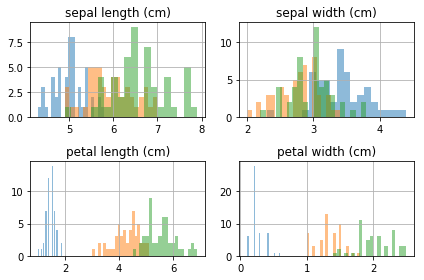

In [7]:
for i in range(4):
    plt.subplot(2,2,i+1)
    tabla_iris[names_iris[i]].loc[tabla_iris.Target==0].hist(alpha=0.5, bins=20)
    tabla_iris[names_iris[i]].loc[tabla_iris.Target==1].hist(alpha=0.5, bins=20)
    tabla_iris[names_iris[i]].loc[tabla_iris.Target==2].hist(alpha=0.5, bins=20)
    plt.title(names_iris[i])
plt.tight_layout()
plt.show()

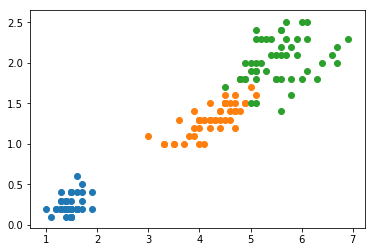

In [9]:
plt.scatter(tabla_iris[names_iris[-2:]].values[tabla_iris.Target==0, 0], 
            tabla_iris[names_iris[-2:]].values[tabla_iris.Target==0, 1])
plt.scatter(tabla_iris[names_iris[-2:]].values[tabla_iris.Target==1, 0], 
            tabla_iris[names_iris[-2:]].values[tabla_iris.Target==1, 1])
plt.scatter(tabla_iris[names_iris[-2:]].values[tabla_iris.Target==2, 0], 
            tabla_iris[names_iris[-2:]].values[tabla_iris.Target==2, 1])
plt.show()

# Problema no lineal

In [6]:
from sklearn.datasets import make_moons

In [20]:
datasetm, targetm = make_moons(noise=0.3, random_state=0)

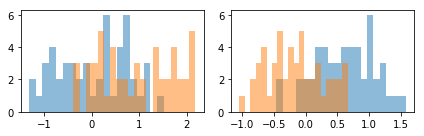

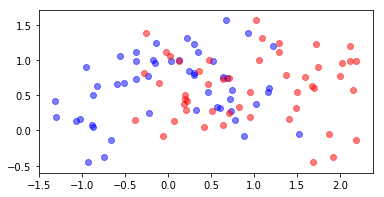

In [53]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
plt.hist(datasetm[target==0, 0], bins=20, alpha=0.5)
plt.hist(datasetm[target==1, 0], bins=20, alpha=0.5)
plt.subplot(1,2,2)
plt.hist(datasetm[target==0, 1], bins=20, alpha=0.5)
plt.hist(datasetm[target==1, 1], bins=20, alpha=0.5)
plt.tight_layout()
plt.figure(figsize=(6,3))
plt.scatter(datasetm[target==0,0], datasetm[target==0,1], color='blue', alpha=0.5)
plt.scatter(datasetm[target==1,0], datasetm[target==0,1], color='red', alpha=0.5)
plt.show()

# Comparar clasificadores

In [41]:
classifiers = [KNeighborsClassifier(3),
               LinearSVC(C=1),
               SVC(gamma=2, C=1),
               DecisionTreeClassifier(max_depth=5),
               ###
               MLPClassifier(alpha=1, activation="identity",
                             hidden_layer_sizes=(100,10),
                             learning_rate="invscaling",
                             learning_rate_init=0.02),
               ###
               GaussianNB(),
               LinearDiscriminantAnalysis()]
namesc = ["KNN", "Linear SVM", "RBF SVM", "Decision Tree",
          "NN", "Naive Bayes", "LDA"]

In [35]:
MLPClassifier?

# Funciones de activación diferentes

# logistic
$$f(x) = \frac{1}{1+e^{-x}}$$

# identity
$$f(x) = x$$

# Normalizar banco de datos

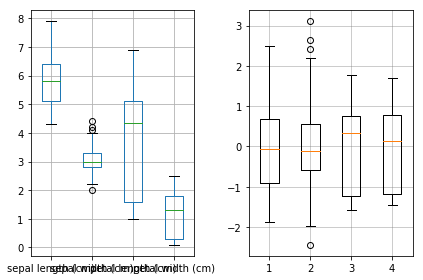

In [16]:
plt.subplot(1,2,1)
tabla_iris[names_iris].boxplot()
plt.subplot(1,2,2)
iris_scaled = StandardScaler().fit_transform(tabla_iris[names_iris])
plt.boxplot(iris_scaled)
plt.grid(color='gray', alpha=0.5)
plt.tight_layout()
plt.show()

# Holdout
Un porcentaje de los datos para entrenamiento (80%) y una otro para prueba (20%)

In [12]:
X = iris_scaled
y = tabla_iris.Target.values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

/home/ramon/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


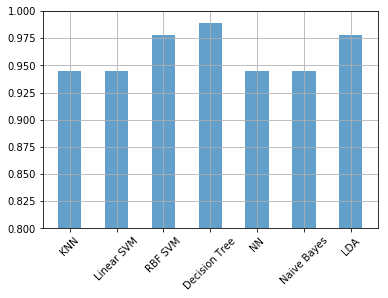

In [27]:
scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    scores.append(score)
plt.bar(range(7), scores, 0.5, alpha=0.7)
plt.xticks(np.arange(7), namesc, rotation=45)
plt.ylim(0.8, 1)
plt.grid()
plt.show()

# Validación cruzada

- Se parte el banco de datos en k segmentos usand k-1 de estos para entrenamiento y 1 para prueba y se calcula el número de clasificaciones buenas contra las malas (Accuracy)
- Se repite k veces la operación cambiando el segmento de prueba
- Se calcula un promedio del Accuracy

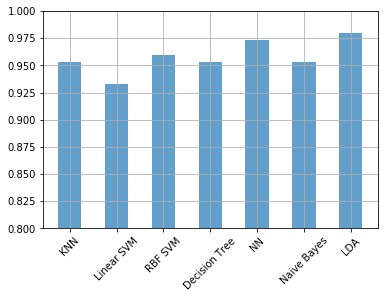

In [42]:
scores = []
for clf in classifiers:
    score = cross_val_score(estimator=clf, cv=5, X=X, y=y, n_jobs=2)
    scores.append(score.mean())
plt.bar(range(7), scores, 0.5, alpha=0.7)
plt.xticks(np.arange(7), namesc, rotation=45)
plt.ylim(0.8, 1)
plt.grid()
plt.show()

# Tarea
### Hacer la misma evaluación sobre el dataset de Moons
- datasetm y targetm

### Observaciones para cada clasificador.